In [0]:
# from google.colab import drive
# drive.mount('/content/drive')

In [0]:
import os
os.chdir("./drive/My Drive/EVA/ULTRON-VISION/ultron-vision")

In [3]:
!nvidia-smi

Sat Jun 13 08:08:50 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.36.06    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   63C    P0    47W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
curr_dir = os.path.abspath(".")
curr_dir

'/content/drive/My Drive/EVA/ULTRON-VISION/ultron-vision'

In [0]:
import sys
sys.path.append(os.path.join(curr_dir))

In [0]:
# !pip install -r requirements.txt

In [0]:
# import agent libraries
from agents import *
from inference import *
from utils.config import process_config

In [0]:
# get config of agent
config_path = "configs/cifar10_config.json"

In [9]:
config = process_config(config_path)

[INFO]: Hi, This is Ultron. Nice to meet you!!!
[INFO]: Saving Configuration
[INFO]: Configurations are successfully processed and dirs are created.
[INFO]: The pipeline of the project will begin now.


****************************
CONFIGURATION OF THIS EXPERIMENT
****************************
{'agent': 'Cifar10Agent',
 'batch_size': 64,
 'checkpoint_file': 'checkpoint.pth.tar',
 'epochs': 50,
 'exp_name': 'cifar10_exp-009',
 'gpu_device': 0,
 'inference_agent': 'Cifar10IAgent',
 'input_size': [3, 32, 32],
 'interpret_image': True,
 'l1_decay': 1e-06,
 'l2_decay': 0.005,
 'learning_rate': 0.1,
 'load_checkpoint': True,
 'mean': [0.4914, 0.4822, 0.4465],
 'model_stats_file': 'stats.json',
 'momentum': 0.9,
 'num_workers': 4,
 'pin_memory': True,
 'save_checkpoint': True,
 'scheduler': {'kwargs': {'anneal_strategy': 'cos',
                          'base_momentum': 0.85,
                          'cycle_momentum': True,
                          'div_factor': 10,
                          'final_div_factor': 10000.0,
                          'last_epoch': -1,
                          'max_momentum': 0.95,
                          'pct_start': 0.3},
               'lr_factor': 1,
     

# EXPERIMENT 1

high batch size, increasing for 20% of iterations, high l2 decay = 0.005

In [0]:
# as we are using one cycle policy we are defining arguments for the scheduler for testing
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 24
config["l2_decay"] = 0.005 # high decay
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 1000
config["scheduler"]["kwargs"]["epochs"] = 24
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


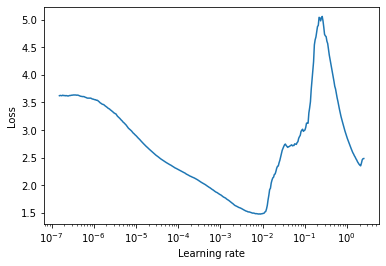

[INFO]: Learning rate with minimum loss : 0.008836514445092735
[INFO]: Setting optimizer to optim learning rate : 0.009
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
    GhostBatchNorm-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
    GhostBatchNorm-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
    GhostBatchNorm-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
   GhostBatchNorm-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128

In [11]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [12]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(f"\nTime Taken {(time.time()-start)} seconds")
agent.finalize()

[INFO]: Current lr value = 0.0009
loss = 7.278963088989258 batch_id = 97: 100%|██████████| 98/98 [00:20<00:00,  4.76it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0195	ACC : 37.7200
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0032	ACC : 42.2100
[INFO]: Current lr value = 0.0025910950149126543
loss = 6.031548023223877 batch_id = 97: 100%|██████████| 98/98 [00:21<00:00,  4.59it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0137	ACC : 58.5800
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0021	ACC : 63.7700
[INFO]: Current lr value = 0.004282190029825309
loss = 5.917501449584961 batch_id = 97: 100%|██████████| 98/98 [00:22<00:00,  4.30it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0119	ACC : 67.5860
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0025	ACC : 63.9800
[INFO]: Current lr value = 0.0059732850447379625
loss = 5.846883773803711 batch_id = 97: 100%|██████████| 98/98 [00:22<00:00,  4.33it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0110	ACC : 72.9620
[INFO]: VALID EPOCH : 3	LOSS 


Time Taken 943.8736324310303 seconds


[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


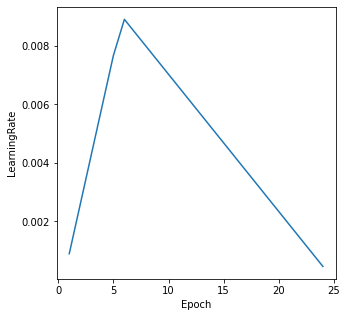

[INFO]: Learning Rate Graph saved.


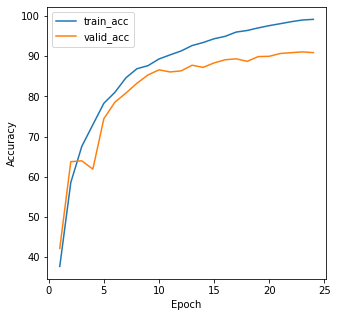

[INFO]: Accuracy Graph saved.


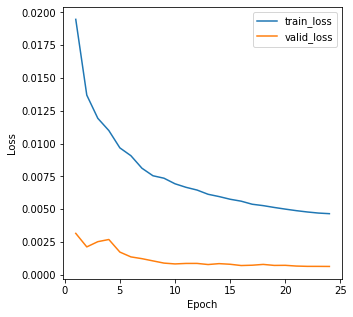

[INFO]: Loss Graph saved.


In [13]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)
iagent.plot_lr_graph()
iagent.plot_accuracy_graph()
iagent.plot_loss_graph()

Can see overfitting early stage.

Let's check when keeping l2 decay low

# EXPERIMENT 2

change l2_decay from 0.005 > 0.0005

and final_div_factor = 1 

In [0]:
# as we are using one cycle policy we are defining arguments for the scheduler for testing
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 24
config["l2_decay"] = 0.0005 # low decay
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 1
config["scheduler"]["kwargs"]["epochs"] = 24
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


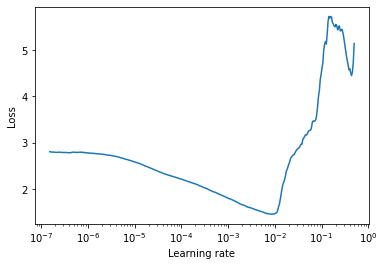

[INFO]: Learning rate with minimum loss : 0.008466149835157154
[INFO]: Setting optimizer to optim learning rate : 0.008
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
    GhostBatchNorm-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
    GhostBatchNorm-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
    GhostBatchNorm-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
   GhostBatchNorm-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128

In [15]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [16]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(f"\nTime Taken {(time.time()-start)} seconds")
agent.finalize()

[INFO]: Current lr value = 0.0008
loss = 5.880067348480225 batch_id = 97: 100%|██████████| 98/98 [00:22<00:00,  4.31it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0134	ACC : 44.3100
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0025	ACC : 56.6600
[INFO]: Current lr value = 0.002303195568811248
loss = 4.0003437995910645 batch_id = 97: 100%|██████████| 98/98 [00:21<00:00,  4.47it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0091	ACC : 63.8280
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0017	ACC : 69.5500
[INFO]: Current lr value = 0.0038063911376224964
loss = 3.2998831272125244 batch_id = 97: 100%|██████████| 98/98 [00:23<00:00,  4.22it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0078	ACC : 71.1360
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0015	ACC : 74.6400
[INFO]: Current lr value = 0.005309586706433745
loss = 3.844680070877075 batch_id = 97: 100%|██████████| 98/98 [00:23<00:00,  4.26it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0063	ACC : 76.7980
[INFO]: VALID EPOCH : 3	LOSS


Time Taken 861.3795909881592 seconds


[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


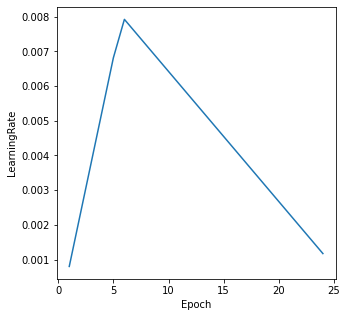

[INFO]: Learning Rate Graph saved.


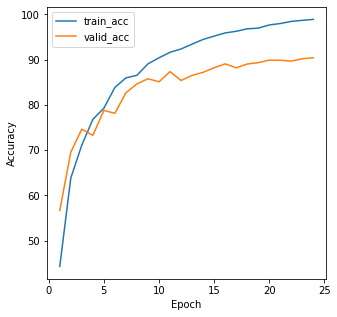

[INFO]: Accuracy Graph saved.


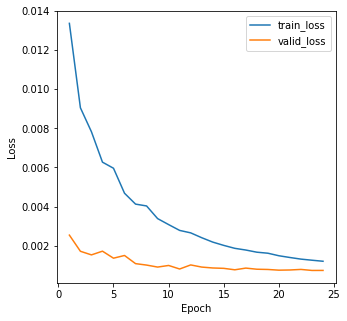

[INFO]: Loss Graph saved.


In [17]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)
iagent.plot_lr_graph()
iagent.plot_accuracy_graph()
iagent.plot_loss_graph()

Though, decreasing l2 norm, the gap between train and val loss has decreased with much extent.

There are clear signs of overfitting. We will add some augumentation.

# EXPERIMENT 3

added rotate augmentation, do final_div_factor with 100

In [0]:
# as we are using one cycle policy we are defining arguments for the scheduler for testing
config["batch_size"] = 512
config["scheduler"]["kwargs"]["pct_start"] = 0.2
config["epochs"] = 24
config["l2_decay"] = 0.0005 # low decay
config["scheduler"]["kwargs"]["div_factor"] = 10
config["scheduler"]["kwargs"]["final_div_factor"] = 100
config["scheduler"]["kwargs"]["epochs"] = 24
config["scheduler"]["kwargs"]["anneal_strategy"] = "linear"

[INFO]: TRAINING MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: FINDING OPTIM LEARNING RATE...


Stopping early, the loss has diverged

Learning rate search finished. See the graph with {finder_name}.plot()


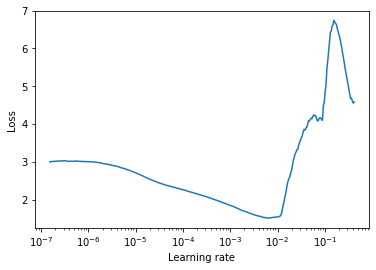

[INFO]: Learning rate with minimum loss : 0.006273655416076465
[INFO]: Setting optimizer to optim learning rate : 0.006
[INFO]: Program will RUN on ****GPU-CUDA****
[INFO]: __Python VERSION : 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
[INFO]: __pytorch VERSION : 1.5.0+cu101
[INFO]: __CUDNN VERSION : 7603
[INFO]: __Number CUDA Devices : 1
[INFO]: __Devices
[INFO]: Active CUDA Device : GPU 0
[INFO]: Available devices 1
[INFO]: Current CUDA device 0


****************************
**********NETWORK SUMMARY**********
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
    GhostBatchNorm-2           [-1, 64, 32, 32]             128
              ReLU-3           [-1, 64, 32, 32]               0
            Conv2d-4          [-1, 128, 32, 32]          73,728
         MaxPool2d-5          [-1, 128, 16, 16]               0
    GhostBatchNorm-6          [-1, 128, 16, 16]             256
              ReLU-7          [-1, 128, 16, 16]               0
            Conv2d-8          [-1, 128, 16, 16]         147,456
    GhostBatchNorm-9          [-1, 128, 16, 16]             256
             ReLU-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,456
   GhostBatchNorm-12          [-1, 128, 16, 16]             256
             ReLU-13          [-1, 128

In [11]:
# initialize agent and find max_lr using lr_finder
agent_class = globals()[config["agent"]]
agent = agent_class(config)

In [12]:
import time
start = time.time()
# run for few epochs and check the graph
agent.run()
print(f"\nTime Taken {(time.time()-start)} seconds")
agent.finalize()

[INFO]: Current lr value = 0.0006000000000000001
loss = 5.171276092529297 batch_id = 97: 100%|██████████| 98/98 [00:23<00:00,  4.20it/s]
[INFO]: TRAIN EPOCH : 0	LOSS : 0.0134	ACC : 43.3380
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 0	LOSS : 0.0025	ACC : 55.4000
[INFO]: Current lr value = 0.0017273966766084363
loss = 3.9410955905914307 batch_id = 97: 100%|██████████| 98/98 [00:24<00:00,  3.98it/s]
[INFO]: TRAIN EPOCH : 1	LOSS : 0.0094	ACC : 62.6820
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 1	LOSS : 0.0022	ACC : 65.4400
[INFO]: Current lr value = 0.002854793353216873
loss = 3.1715848445892334 batch_id = 97: 100%|██████████| 98/98 [00:24<00:00,  4.06it/s]
[INFO]: TRAIN EPOCH : 2	LOSS : 0.0080	ACC : 69.1940
[INFO]: Saved Best Model
[INFO]: VALID EPOCH : 2	LOSS : 0.0018	ACC : 71.2900
[INFO]: Current lr value = 0.003982190029825309
loss = 3.3815197944641113 batch_id = 97: 100%|██████████| 98/98 [00:24<00:00,  3.99it/s]
[INFO]: TRAIN EPOCH : 3	LOSS : 0.0071	ACC : 73.9340
[INFO]: VALI


Time Taken 965.0798389911652 seconds


[INFO]: INFERENCE MODE ACTIVATED!!!


Files already downloaded and verified
Files already downloaded and verified


[INFO]: Program will RUN on ****GPU-CUDA****


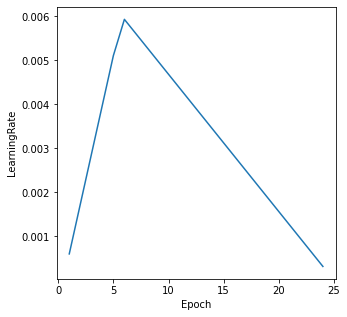

[INFO]: Learning Rate Graph saved.


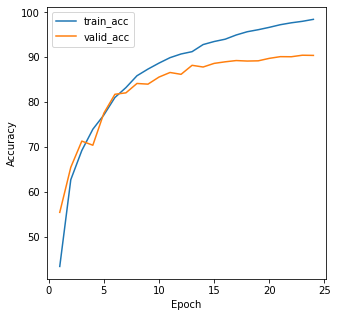

[INFO]: Accuracy Graph saved.


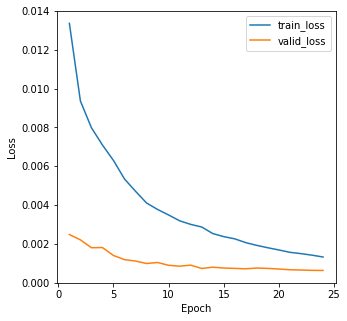

[INFO]: Loss Graph saved.


In [13]:
iagent_class = globals()[config["inference_agent"]]
iagent = iagent_class(config)
iagent.plot_lr_graph()
iagent.plot_accuracy_graph()
iagent.plot_loss_graph()